In [2]:
import geopandas as gpd

lines = gpd.read_file('../_terkep.kml')

In [31]:
import pandas as pd

dump1 = pd.read_pickle('../tmp/dump1.pkl')
gdf = gpd.GeoDataFrame(
    dump1,
    geometry=gpd.points_from_xy(dump1['lon'], dump1['lat']),
    crs='EPSG:4326'
)
utm_crs = gdf.estimate_utm_crs()
gdf = gdf.to_crs(utm_crs)

In [36]:
lines = lines.to_crs(utm_crs)

In [37]:
random_entry = gdf.sample(1)

In [73]:
random_entry['relation']

115043    Zirc - Győr
Name: relation, dtype: category
Categories (346, object): ['Abaújszántó - Szerencs', 'Ajka - Budapest-Déli', 'Ajka - Celldömölk', 'Ajka - Szombathely', ..., 'Örs vezér tere - Cinkota', 'Örs vezér tere - Csömör', 'Örs vezér tere - Gödöllő', 'Őriszentpéter - Zalaegerszeg']

In [74]:
pt = random_entry['geometry'].values[0]

In [76]:
lines.loc[lines['geometry'].distance(pt).idxmin(), 'relation'] = random_entry['relation'].values[0]

In [92]:
zirc_gyor_line = lines.loc[37].values[2]

In [83]:
zirc_gyor_trains = gdf[gdf['relation'] == 'Zirc - Győr']

In [ ]:
gdf['closest_line_idx'] = gdf['geometry'].apply(lambda pt: lines['geometry'].distance(pt).idxmin())

In [89]:
gdf.to_pickle('tmp/gdf-with-closest-line.pkl')

In [90]:
zirc_gyor_train_points = zirc_gyor_trains['geometry']

In [98]:
from shapely.ops import nearest_points

zirc_gyor_fitted_points = [nearest_points(pt, zirc_gyor_line)[1] for pt in zirc_gyor_train_points]

In [105]:
import folium

m = folium.Map(location=[gdf['lat'].mean(), gdf['lon'].mean()], zoom_start=10)

for point in zirc_gyor_fitted_points:
    folium.CircleMarker(location=(point.x, point.y), color='#000000').add_to(m)

m

In [112]:
fitted_points = gpd.GeoSeries(zirc_gyor_fitted_points, crs=utm_crs)

In [113]:
fitted_points.to_crs('epsg:4326')

0      POINT (17.87779 47.26711)
1      POINT (17.87779 47.26711)
2      POINT (17.87779 47.26711)
3      POINT (17.87778 47.26712)
4      POINT (17.87778 47.26712)
                 ...            
285    POINT (17.67031 47.63427)
286    POINT (17.67031 47.63427)
287    POINT (17.67031 47.63427)
288    POINT (17.66358 47.64188)
289    POINT (17.66358 47.64188)
Length: 290, dtype: geometry

<Axes: >

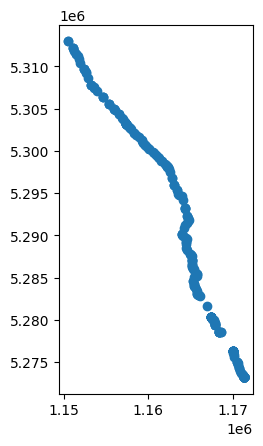

In [114]:
fitted_points.plot()

In [137]:
zirc_gyor_line.project(fitted_points[1])

51701.34825460046